In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
!gdown --id 1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5
To: /content/kddcup.data_10_percent
100% 74.9M/74.9M [00:01<00:00, 60.9MB/s]


In [3]:
df = pd.read_csv('/content/kddcup.data_10_percent')
df.head()
#
df_names =['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate',
'srv_diff_host_rate' ,
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])
X.columns= df_names
X.drop(columns = ['duration',
'protocol_type','flag','dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login','serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate'],inplace=True)
X.head(20)
# Get the frequency of each service type
service_counts = X['service'].value_counts()

# Print the frequency of each service type
print("Service types and their frequencies:")
print(service_counts)


# Assuming your dataframe is named 'df' and the column of interest is 'service'
unique_services = X['service'].unique()

# Print the unique service types
print("Unique service types:")
print(unique_services)



Service types and their frequencies:
service
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64
Unique service types:
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']


In [50]:
#label encoding

#for X
Xcopy = X.copy()
Xcopy
y
le = LabelEncoder()
X['service'] = le.fit_transform(X['service'])
X
for original_value, encoded_value in zip(le.classes_, range(len(le.classes_))):
    print(f"Original value: {original_value} -> Encoded value: {encoded_value}")
ycopy = y.copy()
ycopy


#preprocessing y so all attack types consider as attack not their names
y = np.where(y == 'normal.', 'normal', 'attack')
np.unique(y)


normal_count = np.sum(y == 'normal')
print('normal count in y' , normal_count)

le_y = LabelEncoder()
y = le_y.fit_transform(y)  #1 is normal and 0 is attack

np.unique(y)
y


,service,src_bytes,count,srv_count,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate
0,22,239,8,8,0.00,19,19,0.00,0.0
1,22,235,8,8,0.00,29,29,0.00,0.0
2,22,219,6,6,0.00,39,39,0.00,0.0
3,22,217,6,6,0.00,49,49,0.00,0.0
4,22,217,6,6,0.00,59,59,0.00,0.0
...,...,...,...,...,...,...,...,...,...
494015,22,310,4,5,0.40,86,255,0.05,0.0
494016,22,282,6,6,0.00,6,255,0.05,0.0
494017,22,203,6,18,0.17,16,255,0.05,0.0
494018,22,291,6,12,0.17,26,255,0.05,0.0


In [34]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2 , random_state=42)
X_train

normal_count_train = np.sum(y_train == 1)
print('normal count in y_train' , normal_count_train)

attack_count_train = np.sum(y_train == 0)
print('attack count in y_train' , attack_count_train)

normal_count_train = np.sum(y_test == 1)
print('normal count in y_test' , normal_count_train)


attack_count_test = np.sum(y_test == 0)
print('attack count in y_test' , attack_count_test)


normal count in y_train 77909
attack count in y_train 317307
normal count in y_test 19368
attack count in y_test 79436


In [46]:
#model

xgb = XGBClassifier()
xgb.fit(X_train ,y_train)

rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [49]:
#prediction

y_pred = xgb.predict(X_test)
acc_score = accuracy_score(y_test, y_pred, normalize = True)
print ('XGBoost accuracy score ',acc_score)

y_pred_rf = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test ,y_pred_rf)
print ('Random forests accuracy score :', rf_acc_score)

XGBoost accuracy score  0.9996052791384964
Random forests accuracy score : 0.9996558843771507


In [44]:
# Save the model to a file
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

# Load the model from the file
with open('xgb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify that the loaded model works as expected
print("Model score:", loaded_model.score(X_test, y_test))

Model score: 0.9996052791384964


In [52]:
#check for over fitting


# Predict on training and testing sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Check for overfitting
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("The model might be overfitting.")
else:
    print("The model does not appear to be overfitting.")


#model is over fitted gue to the result

Training Accuracy: 0.9999772276426055
Test Accuracy: 0.9996052791384964
The model does not appear to be overfitting.


In [53]:
#cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb , X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {np.mean(scores)}")

Cross-validation scores: [0.98345209 0.99985831 0.99986843 0.99966601 0.99913971]
Average cross-validation score: 0.9963969070078134


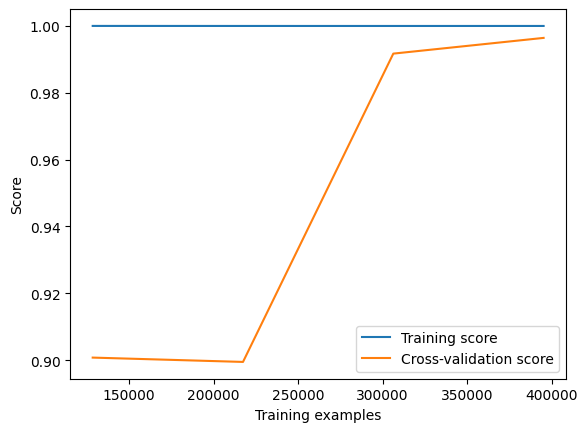

In [55]:
#learning curves

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(xgb , X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()